#**Airbnb Project(1)**

<table align="center">
  
  <td align="center"><a target="_blank" href="https://colab.research.google.com/drive/1_zqgsE4M3M7xjlDgkoPYiRNBXg4OT4rV?authuser=2#scrollTo=spJCE-HI8CNk">
        <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTR7EtP27gljpJg91k2DVoRgkB84hkMl78bOA&usqp=CAU""  style="padding-bottom:5px;" />
        
  Run this project in Google Colab</a></td>
  
</table>

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# **Getting data**

In [223]:
%ls 

airbnb-listings.csv  cleandata  drive/  sample_data/


In [ ]:
#upload the files from the directory
from google.colab import files
files.upload()

**!!This can be safely skipped and start from the "Start with cleaned data section"!!**

In [133]:
df=pd.read_csv("airbnb-listings.csv")

Check data table

In [ ]:
df.info()

In [189]:
df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20181206023014,2018-12-06,"Bright, Modern Garden Unit - 1BR/1B",Our bright garden unit overlooks a grassy back...,"Newly remodeled, modern, and bright garden uni...",Our bright garden unit overlooks a grassy back...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,NaN,NaN,https://a0.muscache.com/im/pictures/b7c2a199-4...,NaN,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,NaN,NaN,NaN,t,https://a0.muscache.com/im/pictures/efdad96a-3...,https://a0.muscache.com/im/pictures/efdad96a-3...,Duboce Triangle,1,1,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Duboce Triangle,Western Addition,...,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",NaN,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,1,30,today,t,3,4,5,74,2018-12-06,172,2009-07-23,2018-11-16,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t,STR-0001256,"{""SAN FRANCISCO""}",t,f,moderate,f,f,1,1.51
1,5858,https://www.airbnb.com/rooms/5858,20181206023014,2018-12-06,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,"Please respect the house, the art work, the fu...",NaN,NaN,https://a0.muscache.com/im/pictures/17714/3a7a...,NaN,8904,https://www.airbnb.com/users/show/8904,Philip And Tania,2009-03-02,"San Francisco, California, United States",Philip: English transplant to the Bay Area and...,within a few hours,70%,NaN,f,https://a0.muscache.com/im/users/8904/profile_...,https://a0.muscache.com/im/users/8904/profile_...,Bernal Heights,2,2,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"San Francisco, CA, United States",Bernal Heights,Bernal Heights,...,3.0,Real Bed,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",NaN,$235.00,"$1,600.00","$5,500.00",NaN,$100.00,2,$0.00,30,60,5 days ago,t,30,60,90,365,2018-12-06,112,2009-05-03,2017-08-06,98.0,10.0,10.0,10.0,10.0,10.0,9.0,t,NaN,"{""SAN FRANCISCO""}",f,f,strict_14_with_grace_period,f,f,1,0.96
2,7918,https://www.airbnb.com/rooms/7918,20181206023014,2018-12-06,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rent

How many records in this dataframe?How many columns in this dataframe? Let's explore that

In [135]:
print("number of samples in the data are",df.shape[0])
print("number of columns/features in the data are",df.shape[1])

number of samples in the data are 7072
number of columns/features in the data are 96


In [ ]:
c=1
for i in df.columns:
  print("Columns/Feature ",c," is",i)
  c+=1

# **Data cleaning**

**Lets explore the columns**

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7072 entries, 0 to 7071
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                7072 non-null   int64  
 1   listing_url                       7072 non-null   object 
 2   scrape_id                         7072 non-null   int64  
 3   last_scraped                      7072 non-null   object 
 4   name                              7072 non-null   object 
 5   summary                           6868 non-null   object 
 6   space                             5996 non-null   object 
 7   description                       7052 non-null   object 
 8   experiences_offered               7072 non-null   object 
 9   neighborhood_overview             5147 non-null   object 
 10  notes                             4346 non-null   object 
 11  transit                           5129 non-null   object 
 12  access

We dont need all the columns for our analysis. We are going to use some of them so we can create new data frame with the selected columns.

In [138]:
selected_columns = [
  'host_is_superhost',
  'cancellation_policy',
  'instant_bookable',
  'host_total_listings_count',
  'neighbourhood_cleansed',
  'zipcode',
  'latitude',
  'longitude',
  'property_type',
  'room_type',
  'accommodates',
  'bathrooms',
  'bedrooms',
  'beds',
  'bed_type',
  'minimum_nights',
  'number_of_reviews',
  'review_scores_rating',
  'review_scores_accuracy',
  'review_scores_cleanliness',
  'review_scores_checkin',
  'review_scores_communication',
  'review_scores_location',
  'review_scores_value',
  'price']

newdf = df[selected_columns]
print("Number of columns in our new dataframe is ",newdf.shape[1])
print("We selected ",newdf.shape[1]," columns out of ",df.shape[1]," columns for our analysis")
newdf.head()


Number of columns in our new dataframe is  25
We selected  25  columns out of  96  columns for our analysis


,host_is_superhost,cancellation_policy,instant_bookable,host_total_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,t,moderate,t,1,Western Addition,94117.0,37.769310,-122.433856,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,1,172,97.0,10.0,10.0,10.0,10.0,10.0,10.0,$170.00
1,f,strict_14_with_grace_period,f,2,Bernal Heights,94110.0,37.745112,-122.421018,Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,30,112,98.0,10.0,10.0,10.0,10.0,10.0,9.0,$235.00
2,f,strict_14_with_grace_period,f,10,Haight Ashbury,94117.0,37.766690,-122.452505,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,32,17,85.0,8.0,8.0,9.0,9.0,9.0,8.0,$65.00
3,f,strict_14_with_grace_period,f,10,Haight Ashbury,94117.0,37.764872,-122.451828,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,32,8,93.0,9.0,9.0,10.0,10.0,9.0,9.0,$65.00
4,f,strict_14_with_grace_period,f,2,Western Addition,94117.0,37.775249,-122.436374,House,Entire home/apt,5,1.5,2.0,2.0,Real Bed,7,27,97.0,10.0,10.0,10.0,10.0,10.0,9.0,$785.00


Check the data types of the features

In [139]:
newdf.dtypes

host_is_superhost               object
cancellation_policy             object
instant_bookable                object
host_total_listings_count        int64
neighbourhood_cleansed          object
zipcode                        float64
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
minimum_nights                   int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
price                           object
dtype: object

If we select price as our target we can see that the data type of
the price column is not numeric so the first step is to convert them into numeric column a with proper cleaning

In [140]:
newdf['price'].head(4)

0    $170.00
1    $235.00
2     $65.00
3     $65.00
Name: price, dtype: object

noticed that there is also an "$" sign. So we must take care of this care fully

In [141]:
newdf.replace({'price': r'[\$]'}, {'price': ''}, regex=True,inplace=True)
newdf.replace({'price': r'[\,]'}, {'price': ''}, regex=True,inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [142]:
newdf['price'].head(4)

0    170.00
1    235.00
2     65.00
3     65.00
Name: price, dtype: object

It is cleaned but still the datatype is not numeric

In [143]:
newdf['price']=newdf['price'].astype('float64')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
newdf['price'].head(4)

0    170.0
1    235.0
2     65.0
3     65.0
Name: price, dtype: float64

In [145]:
newdf.describe(include='all')

,host_is_superhost,cancellation_policy,instant_bookable,host_total_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
count,7072,7072,7072,7072.000000,7072,6879.000000,7072.000000,7072.000000,7072,7072,7072.000000,7053.000000,7071.000000,7067.000000,7072,7.072000e+03,7072.000000,5713.000000,5710.000000,5710.000000,5709.000000,5712.000000,5709.000000,5708.000000,7072.000000
unique,2,6,2,NaN,36,NaN,NaN,NaN,24,3,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,f,strict_14_with_grace_period,f,NaN,Mission,NaN,NaN,NaN,Apartment,Entire home/apt,NaN,NaN,NaN,NaN,Real Bed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4443,3182,4393,NaN,725,NaN,NaN,NaN,3080,4366,NaN,NaN,NaN,NaN,6999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,60.621324,NaN,94114.884576,37.765950,-122.430704,NaN,NaN,3.184389,1.328584,1.346768,1.741616,NaN,1.415635e+04,43.247031,95.565902,9.761121,9.625044,9.867402,9.837360,9.613593,9.401542,212.993920
std,NaN,NaN,NaN,221.850955,NaN,15.652162,0.022484,0.026684,NaN,NaN,1.902724,0.743306,0.913959,1.163300,NaN,1.189129e+06,71.176549,6.963257,0.678495,0.765363,0.506203,0.599992,0.744000,0.817890,333.335336
min,NaN,NaN,NaN,0.000000,NaN,94014.000000,37.705088,-122.513065,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,1.000000e+00,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
25%,NaN,NaN,NaN,1.000000,NaN,94109.000000,37.751316,-122.443053,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,2.000000e+00,1.000000,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,100.000000
50%,NaN,NaN,NaN,2.000000,NaN,94114.000000,37.767871,-122.425435,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,4.000000e+00,12.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,150.000000
75%,NaN,NaN,NaN,7.000000,NaN,94121.000000,37.784606,-122.411558,NaN,NaN,4.000000,1.500000,2.000000,2.000000,NaN,3.000000e+01,54.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,232.250000


As we have different count results for the different columns, that means we have null values records for some columns. 
There are a few nulls in the categorical feature `zipcode`. Let's get rid of those rows where any of that column is null, so this is the simplest approach for the time being.


In [146]:
#help(newdf.dropna)

In [147]:
newdf.dropna(axis=0,subset=['zipcode'],inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
newdf.describe(include='all')

,host_is_superhost,cancellation_policy,instant_bookable,host_total_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
count,6879,6879,6879,6879.000000,6879,6879.000000,6879.000000,6879.000000,6879,6879,6879.000000,6860.000000,6878.000000,6874.000000,6879,6.879000e+03,6879.000000,5637.000000,5634.000000,5634.000000,5633.000000,5636.000000,5633.000000,5632.000000,6879.000000
unique,2,6,2,NaN,36,NaN,NaN,NaN,24,3,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,f,strict_14_with_grace_period,f,NaN,Mission,NaN,NaN,NaN,Apartment,Entire home/apt,NaN,NaN,NaN,NaN,Real Bed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4419,3166,4207,NaN,711,NaN,NaN,NaN,2937,4186,NaN,NaN,NaN,NaN,6806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,48.828754,NaN,94114.884576,37.765630,-122.431046,NaN,NaN,3.182149,1.326968,1.346612,1.747163,NaN,1.455274e+04,44.339148,95.557921,9.760561,9.623536,9.866146,9.839780,9.615125,9.406072,213.863934
std,NaN,NaN,NaN,210.523399,NaN,15.652162,0.022571,0.026800,NaN,NaN,1.909663,0.744970,0.911025,1.167019,NaN,1.205694e+06,71.786236,6.950989,0.680430,0.767311,0.508988,0.588008,0.740421,0.808663,337.785933
min,NaN,NaN,NaN,0.000000,NaN,94014.000000,37.705088,-122.513065,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,1.000000e+00,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
25%,NaN,NaN,NaN,1.000000,NaN,94109.000000,37.750935,-122.443491,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,2.000000e+00,2.000000,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,100.000000
50%,NaN,NaN,NaN,2.000000,NaN,94114.000000,37.767096,-122.425715,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,3.000000e+00,13.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,150.000000
75%,NaN,NaN,NaN,6.000000,NaN,94121.000000,37.784318,-122.411701,NaN,NaN,4.000000,1.500000,2.000000,2.000000,NaN,3.000000e+01,56.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,234.000000


Some rows are dropped, but still there are some columns with differnet numbers of records


Now let's try imputation for numerical features. We want to fill the nulls in some numerical features with the median of that column. 

In [149]:
cols = [
  "bedrooms",
  "bathrooms",
  "beds",
  "review_scores_rating",
  "review_scores_accuracy",
  "review_scores_cleanliness",
  "review_scores_checkin",
  "review_scores_communication",
  "review_scores_location",
  "review_scores_value"
]

In [150]:
newdf.fillna(newdf.median()[cols],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
newdf.info()

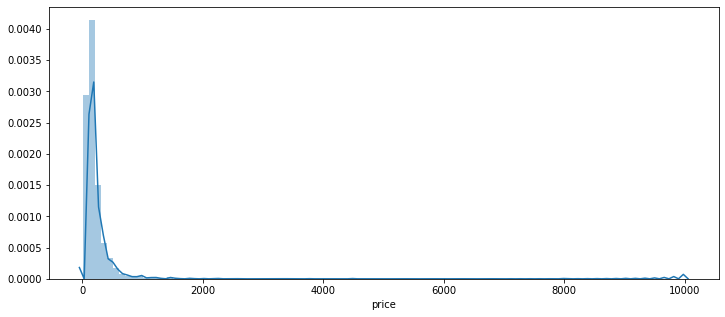

In [220]:
plt.figure(figsize=(12,5),)
sns.distplot((newdf.price),bins=100,kde=True)

Seems not normal. Is it log normal? lets see.

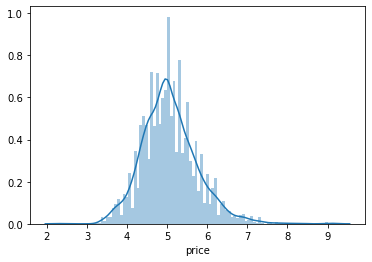

In [221]:
sns.distplot(np.log(newdf['price']),bins=100)

In [152]:
newdf.describe(include='all')

,host_is_superhost,cancellation_policy,instant_bookable,host_total_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
count,6879,6879,6879,6879.000000,6879,6879.000000,6879.000000,6879.000000,6879,6879,6879.000000,6879.000000,6879.000000,6879.000000,6879,6.879000e+03,6879.000000,6879.000000,6879.000000,6879.000000,6879.000000,6879.000000,6879.000000,6879.000000,6879.000000
unique,2,6,2,NaN,36,NaN,NaN,NaN,24,3,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,f,strict_14_with_grace_period,f,NaN,Mission,NaN,NaN,NaN,Apartment,Entire home/apt,NaN,NaN,NaN,NaN,Real Bed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4419,3166,4207,NaN,711,NaN,NaN,NaN,2937,4186,NaN,NaN,NaN,NaN,6806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,48.828754,NaN,94114.884576,37.765630,-122.431046,NaN,NaN,3.182149,1.326065,1.346562,1.746620,NaN,1.455274e+04,44.339148,95.998837,9.803896,9.691670,9.890391,9.868731,9.684838,9.513737,213.863934
std,NaN,NaN,NaN,210.523399,NaN,15.652162,0.022571,0.026800,NaN,NaN,1.909663,0.744138,0.910968,1.166769,NaN,1.205694e+06,71.786236,6.361916,0.622639,0.709368,0.463459,0.535789,0.686209,0.766640,337.785933
min,NaN,NaN,NaN,0.000000,NaN,94014.000000,37.705088,-122.513065,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,1.000000e+00,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
25%,NaN,NaN,NaN,1.000000,NaN,94109.000000,37.750935,-122.443491,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,2.000000e+00,2.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,100.000000
50%,NaN,NaN,NaN,2.000000,NaN,94114.000000,37.767096,-122.425715,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,3.000000e+00,13.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,150.000000
75%,NaN,NaN,NaN,6.000000,NaN,94121.000000,37.784318,-122.411701,NaN,NaN,4.000000,1.500000,2.000000,2.000000,NaN,3.000000e+01,56.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,234.000000


So, We have same amount of data for all the columns. NOw we are going to deal with the extreme values

In [153]:
#Just checking all the prices are nonnegative or not
if newdf.query('price>=0').price.count() ==newdf.price.count():
  print("We all all the nonnegative values")
print("")
if newdf.query('price==0').price.count()>=1:
  print("We have ",newdf.query('price==0').price.count()," 0 value in price column") 

We all all the nonnegative values

We have  1  0 value in price column


In [154]:
#help(newdf.query)
#We are getting rid of the 0 price row
newdf.query('price>0',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [155]:
newdf['minimum_nights'].describe(include='all')
#newdf.minimum_nights.value_counts()
print("Numebr of entry where minimum nights are greater than 365 days are: ",newdf.query('minimum_nights>365').minimum_nights.count())

Numebr of entry where minimum nights are greater than 365 days are:  4


Minimum Nights max value is too high. Let's get rid of some extreme value

In [156]:
newdf.query('minimum_nights<=365',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [157]:
newdf.describe(include='all')

,host_is_superhost,cancellation_policy,instant_bookable,host_total_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
count,6874,6874,6874,6874.000000,6874,6874.000000,6874.000000,6874.000000,6874,6874,6874.000000,6874.000000,6874.000000,6874.000000,6874,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000
unique,2,6,2,NaN,36,NaN,NaN,NaN,24,3,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,f,strict_14_with_grace_period,f,NaN,Mission,NaN,NaN,NaN,Apartment,Entire home/apt,NaN,NaN,NaN,NaN,Real Bed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4415,3164,4203,NaN,710,NaN,NaN,NaN,2934,4184,NaN,NaN,NaN,NaN,6801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,48.862671,NaN,94114.888711,37.765632,-122.431055,NaN,NaN,3.182427,1.326157,1.346814,1.747018,NaN,15.298225,44.366308,95.998982,9.803899,9.691592,9.890311,9.868635,9.684754,9.513675,213.506255
std,NaN,NaN,NaN,210.596200,NaN,15.657071,0.022575,0.026807,NaN,NaN,1.909766,0.744323,0.911251,1.167050,NaN,21.573598,71.805219,6.363578,0.622772,0.709538,0.463618,0.535972,0.686366,0.766801,335.965629
min,NaN,NaN,NaN,0.000000,NaN,94014.000000,37.705088,-122.513065,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,10.000000
25%,NaN,NaN,NaN,1.000000,NaN,94109.000000,37.750945,-122.443526,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,2.000000,2.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,100.000000
50%,NaN,NaN,NaN,2.000000,NaN,94114.000000,37.767105,-122.425743,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,3.000000,13.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,150.000000
75%,NaN,NaN,NaN,6.000000,NaN,94121.000000,37.784319,-122.411701,NaN,NaN,4.000000,1.500000,2.000000,2.000000,NaN,30.000000,56.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,234.000000


In [158]:
#put this cleaned data into a new file
newdf.to_csv('cleandata')

# **Start with cleaned data**

In [ ]:
#use this when use google colab
#this is the cleaned version of data
#!wget https://raw.githubusercontent.com/gmashik/Machine_learning_projects/master/Airbnb_project/Data/airbnb-cleaned.csv

In [225]:
#cdf=pd.read_csv('airbnb-cleaned.csv')

In [227]:
cdf=pd.read_csv('cleandata')

In [228]:
print("Number of samle in cleaded version is : ",cdf.shape[0])
print("Number of feature in cleaded version is : ",cdf.shape[1])

Number of samle in cleaded version is :  6874
Number of feature in cleaded version is :  26


In [161]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6874 entries, 0 to 6873
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   6874 non-null   int64  
 1   host_is_superhost            6874 non-null   object 
 2   cancellation_policy          6874 non-null   object 
 3   instant_bookable             6874 non-null   object 
 4   host_total_listings_count    6874 non-null   int64  
 5   neighbourhood_cleansed       6874 non-null   object 
 6   zipcode                      6874 non-null   float64
 7   latitude                     6874 non-null   float64
 8   longitude                    6874 non-null   float64
 9   property_type                6874 non-null   object 
 10  room_type                    6874 non-null   object 
 11  accommodates                 6874 non-null   int64  
 12  bathrooms                    6874 non-null   float64
 13  bedrooms          

**We can see that some of our data is not numerical. They are categorical. So we are going to get dummy variables using one-hot encoding.**

First get the categorical columns


In [162]:
categoricalColumns=cdf.select_dtypes(include='object').columns
c=1
for i in categoricalColumns:
  print(" Categorical column number ",c," is ",i)
  c+=1


 Categorical column number  1  is  host_is_superhost
 Categorical column number  2  is  cancellation_policy
 Categorical column number  3  is  instant_bookable
 Categorical column number  4  is  neighbourhood_cleansed
 Categorical column number  5  is  property_type
 Categorical column number  6  is  room_type
 Categorical column number  7  is  bed_type


In [163]:
cdf=pd.get_dummies(cdf,columns=categoricalColumns)
cdf.head()

,Unnamed: 0,host_total_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,host_is_superhost_f,host_is_superhost_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,instant_bookable_f,instant_bookable_t,neighbourhood_cleansed_Bayview,neighbourhood_cleansed_Bernal Heights,neighbourhood_cleansed_Castro/Upper Market,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Crocker Amazon,neighbourhood_cleansed_Diamond Heights,neighbourhood_cleansed_Downtown/Civic Center,neighbourhood_cleansed_Excelsior,neighbourhood_cleansed_Financial District,neighbourhood_cleansed_Glen Park,neighbourhood_cleansed_Golden Gate Park,...,neighbourhood_cleansed_Presidio Heights,neighbourhood_cleansed_Russian Hill,neighbourhood_cleansed_Seacliff,neighbourhood_cleansed_South of Market,neighbourhood_cleansed_Twin Peaks,neighbourhood_cleansed_Visitacion Valley,neighbourhood_cleansed_West of Twin Peaks,neighbourhood_cleansed_Western Addition,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_In-law,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,0,1,94117.0,37.769310,-122.433856,3,1.0,1.0,2.0,1,172,97.0,10.0,10.0,10.0,10.0,10.0,10.0,170.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,2,94110.0,37.745112,-122.421018,5,1.0,2.0,3.0,30,112,98.0,10.0,10.0,10.0,10.0,10.0,9.0,235.0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2,10,94117.0,37.766690,-122.452505,2,4.0,1.0,1.0,32,17,85.0,8.0,8.0,9.0,9.0,9.0,8.0,65.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,3,10,94117.0,37.764872,-122.451828,2,4.0,1.0,1.0,32,8,93.0,9.0,9.0,10.0,10.0,9.0,9.0,65.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,4,2,94117.0,37.775249,-122.436374,5,1.5,2.0,2.0,7,27,97.0,10.0,10.0,10.0,10.0,10.0,9.0,785.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [164]:
cdf.shape

(6874, 97)

In [165]:
X=cdf.drop(['price'],axis=1)
y=cdf['price']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [167]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [168]:
#Define Linear Regression
def linear_regrassion(x,y,cross_val):
  lrmodel=LinearRegression()
  parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
  lrmodel_grids=GridSearchCV(estimator=lrmodel,param_grid=parameters,
                           scoring='neg_mean_squared_error',
                           cv=cross_val,verbose=0,n_jobs=1)
  lrmodel_grids.fit(x,y)
  lrbest_param=lrmodel_grids.best_params_
  print("Best parameters for Linear Regression is :",lrbest_param)



# **Linear regression model result**

In [169]:
linear_regrassion(X_train,y_train,5)

Best parameters for Linear Regression is : {'copy_X': True, 'fit_intercept': False, 'normalize': True}


In [172]:
from sklearn import metrics 
lrmodel=LinearRegression(copy_X=True,fit_intercept=False,normalize=True)
lrmodel.fit(X_train,y_train)
p_test=lrmodel.predict(X_test)
print('Model r2/variance:', lrmodel.score(X_test,y_test))
print('Mean absolute error:', metrics.mean_absolute_error(y_test, p_test))
print('Mean Squared error:', metrics.mean_squared_error(y_test, p_test))
print('Root Mear Squared error:', np.sqrt(metrics.mean_squared_error(y_test,p_test)))


Model r2/variance: -0.20112686805983104
Mean absolute error: 228.5021818181818
Mean Squared error: 186599.9480681818
Root Mear Squared error: 431.97216121896304


# **Ridge Regression Model result**

In [178]:
#Ridge Regression
def ridge_regression(x,y,cross_val):
  ridge_model=Ridge()
  alphas = np.array([1.0,0.01,0.001,0.0001,0.005,0.02,0])
  norm_var= ([True,False])
  parameters={'alpha':alphas,'normalize':norm_var}
  ridgemodel_grid=GridSearchCV(ridge_model,param_grid=parameters,
                               scoring='neg_mean_squared_error',
                               n_jobs=1,
                               cv=cross_val)
  ridgemodel_grid.fit(x,y)
  ridgemodelbest_param=ridgemodel_grid.best_params_
  print("Best parameters for Linear Regression is :",ridgemodelbest_param)


In [179]:
ridge_regression(X_train,y_train,4)

Best parameters for Linear Regression is : {'alpha': 1.0, 'normalize': False}


In [180]:
ridgemodel=Ridge(alpha=1.0,normalize=False)
ridgemodel.fit(X_train,y_train)
p2_test=lrmodel.predict(X_test)
print('Model r2/variance:', ridgemodel.score(X_test,y_test))
print('Mean absolute error:', metrics.mean_absolute_error(y_test, p2_test))
print('Mean Squared error:', metrics.mean_squared_error(y_test, p2_test))
print('Root Mear Squared error:', np.sqrt(metrics.mean_squared_error(y_test,p2_test)))

Model r2/variance: 0.10821640265048904
Mean absolute error: 228.5021818181818
Mean Squared error: 186599.9480681818
Root Mear Squared error: 431.97216121896304


**The error is pretty high we will move to the deep neural network approch now**

# **Neural Network approach**

In [66]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('loss')<60.0):
      print("\nEarly stopping using callback.....")
      self.model.stop_training=True

In [67]:
import tensorflow as tf
callback=myCallback()
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(96,)),
    tf.keras.layers.Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.02)),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.02)),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='rmsprop',loss='mae',metrics=['mse','mae'])

In [ ]:
r=model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test),
callbacks=[callback])

In [ ]:
print("Train Score = ",model.evaluate(X_train,y_train))
print("Test Score = ",model.evaluate(X_test,y_test))

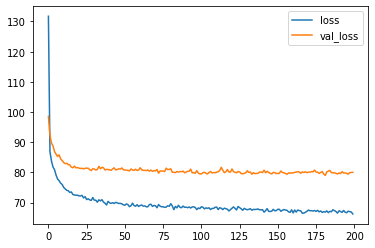

In [70]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

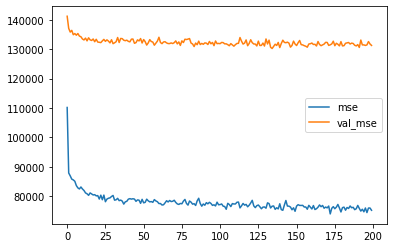

In [71]:
plt.plot(r.history['mse'],label='mse')
plt.plot(r.history['val_mse'],label='val_mse')
plt.legend()

# **Conclusion**

**Still not a great approximation but great than the previous approximations. In this project I cleaned some raw data and explore them a little. I build several simple model for the price prediction. We need a lot more feature engineering or probably try to include more non-linearity to imrove the results**